\***Allergen-Safe Food Recommendation System***


Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import random

Load DataSet

In [ ]:
df = pd.read_csv('food_ingredients_and_allergens.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
df

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
2,Chicken Noodle Soup,Chicken broth,NaN,NaN,Salt,"Chicken, Wheat, Celery",Contains
3,Chicken Noodle Soup,Chicken broth,NaN,NaN,Salt,"Chicken, Wheat, Celery",Contains
4,Cheddar Cheese,Cheese,NaN,NaN,Salt,Dairy,Contains
...,...,...,...,...,...,...,...
394,Lemon Bars,Lemon juice,Sugar,Butter,"Flour, eggs","Wheat, Dairy, Eggs",Contains
395,Pecan Pie,Pecans,Sugar,Butter,Corn syrup,"Wheat, Dairy, Nuts",Contains
396,Zucchini Bread,Zucchini,Sugar,Butter,"Cinnamon, nuts","Wheat, Dairy, Nuts",Contains
397,Banana Bread,Bananas,Sugar,Butter,"Cinnamon, nuts","Wheat, Dairy, Nuts",Contains


Getting To Know The Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Food Product     399 non-null    object
 1   Main Ingredient  399 non-null    object
 2   Sweetener        119 non-null    object
 3   Fat/Oil          341 non-null    object
 4   Seasoning        379 non-null    object
 5   Allergens        251 non-null    object
 6   Prediction       398 non-null    object
dtypes: object(7)
memory usage: 21.9+ KB


In [ ]:
df.describe().round(1)

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Prediction
count,399,399,119,341,379,251,398
unique,259,101,9,35,185,39,2
top,Stuffed Bell Peppers,Chicken,Sugar,Olive oil,Soy sauce,Dairy,Contains
freq,4,61,92,90,15,83,255


Data Cleaning & Pre-processing
(Handle Missing Values & Duplicate Rows)

In [ ]:
df.isna().sum()

,0
Food Product,0
Main Ingredient,0
Sweetener,280
Fat/Oil,58
Seasoning,20
Allergens,148
Prediction,1


<Axes: >

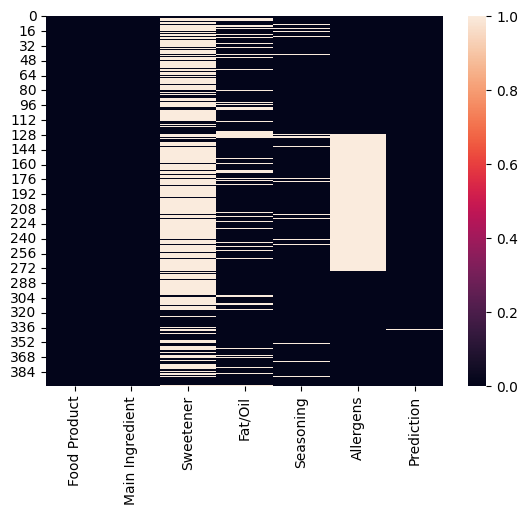

In [ ]:
sns.heatmap(df.isna())

In [ ]:
df.drop(['Fat/Oil', 'Sweetener'], axis=1, inplace= True)

In [ ]:
df.head()

,Food Product,Main Ingredient,Seasoning,Allergens,Prediction
0,Almond Cookies,Almonds,Flour,"Almonds, Wheat, Dairy",Contains
1,Almond Cookies,Almonds,Flour,"Almonds, Wheat, Dairy",Contains
2,Chicken Noodle Soup,Chicken broth,Salt,"Chicken, Wheat, Celery",Contains
3,Chicken Noodle Soup,Chicken broth,Salt,"Chicken, Wheat, Celery",Contains
4,Cheddar Cheese,Cheese,Salt,Dairy,Contains


<Axes: >

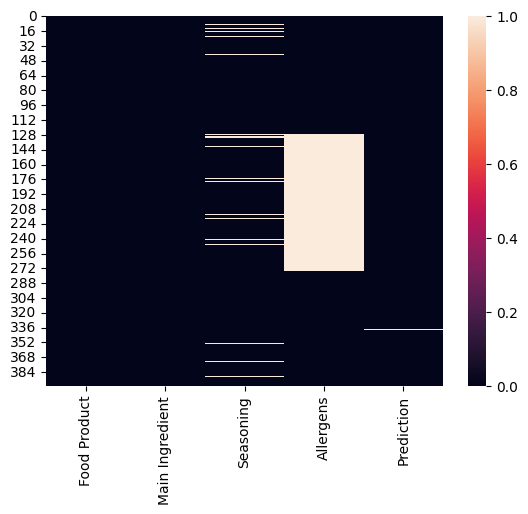

In [ ]:
sns.heatmap(df.isna())

In [ ]:
df.loc[:, 'Prediction'] = df['Prediction'].fillna('Contains')

In [ ]:
seasoning_counts = df['Seasoning'].value_counts()
print(seasoning_counts)

Seasoning
Soy sauce                   15
Flour                       11
Salt                        11
Vanilla extract              8
Mozzarella cheese, basil     6
                            ..
Balsamic vinegar             1
Basil, garlic                1
Tomatoes                     1
BBQ sauce                    1
Pineapple, ham               1
Name: count, Length: 185, dtype: int64


In [ ]:
df.loc[df['Seasoning'].isna(),'Seasoning'] = 'Soy Sauce'

In [ ]:
df.loc[df['Allergens'].isna(),'Allergens'] = 'None'

<Axes: >

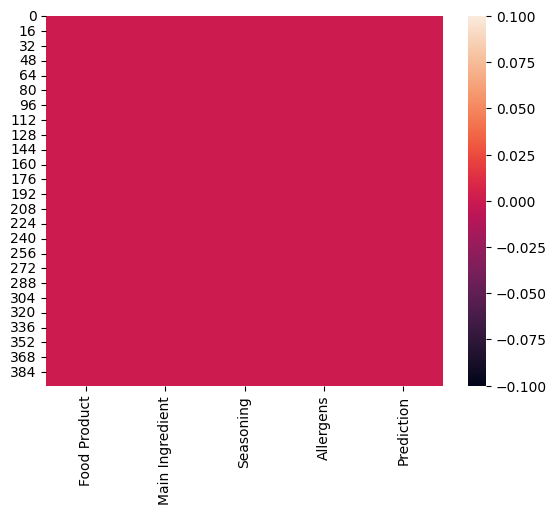

In [ ]:
sns.heatmap(df.isna())

In [ ]:
dups = df.duplicated()
print('Number of duplicate rows = ', (dups.sum())) # Check for duplicate rows in the dataset

Number of duplicate rows =  93


In [ ]:
df = df.drop_duplicates()

In [ ]:
ddups = df.duplicated()
print('Number of duplicate rows = ', (ddups.sum()))

Number of duplicate rows =  0


In [ ]:
df

,Food Product,Main Ingredient,Seasoning,Allergens,Prediction
0,Almond Cookies,Almonds,Flour,"Almonds, Wheat, Dairy",Contains
2,Chicken Noodle Soup,Chicken broth,Salt,"Chicken, Wheat, Celery",Contains
4,Cheddar Cheese,Cheese,Salt,Dairy,Contains
5,Ranch Dressing,Buttermilk,"Garlic, herbs",Dairy,Contains
6,Caramel Popcorn,Popcorn,Salt,Dairy,Contains
...,...,...,...,...,...
393,Lemon Bars,Lemon juice,"Flour, eggs","Wheat, Dairy, Eggs",Contains
395,Pecan Pie,Pecans,Corn syrup,"Wheat, Dairy, Nuts",Contains
396,Zucchini Bread,Zucchini,"Cinnamon, nuts","Wheat, Dairy, Nuts",Contains
397,Banana Bread,Bananas,"Cinnamon, nuts","Wheat, Dairy, Nuts",Contains


In [ ]:
df_numeric = pd.get_dummies(df, drop_first=True, dtype=float)
df_numeric

,Food Product_Aloo Gobi,Food Product_Aloo Paratha,Food Product_Apple,Food Product_Apple Cider,Food Product_Apple Crisp,Food Product_Apple Pie,Food Product_Avocado Toast,Food Product_BBQ Ribs,Food Product_Bacon-Wrapped Shrimp,Food Product_Baked Apple,...,Allergens_Soybeans,"Allergens_Soybeans, Fish",Allergens_Wheat,"Allergens_Wheat, Dairy","Allergens_Wheat, Dairy, Alcohol","Allergens_Wheat, Dairy, Cocoa","Allergens_Wheat, Dairy, Eggs","Allergens_Wheat, Dairy, Nuts","Allergens_Wheat, Pork, Dairy",Prediction_Does not contain
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_numeric = df_numeric.rename(columns={"Prediction_Does not contain": "Prediction"})

**Exploratory Data Analysis & Data Visualization**

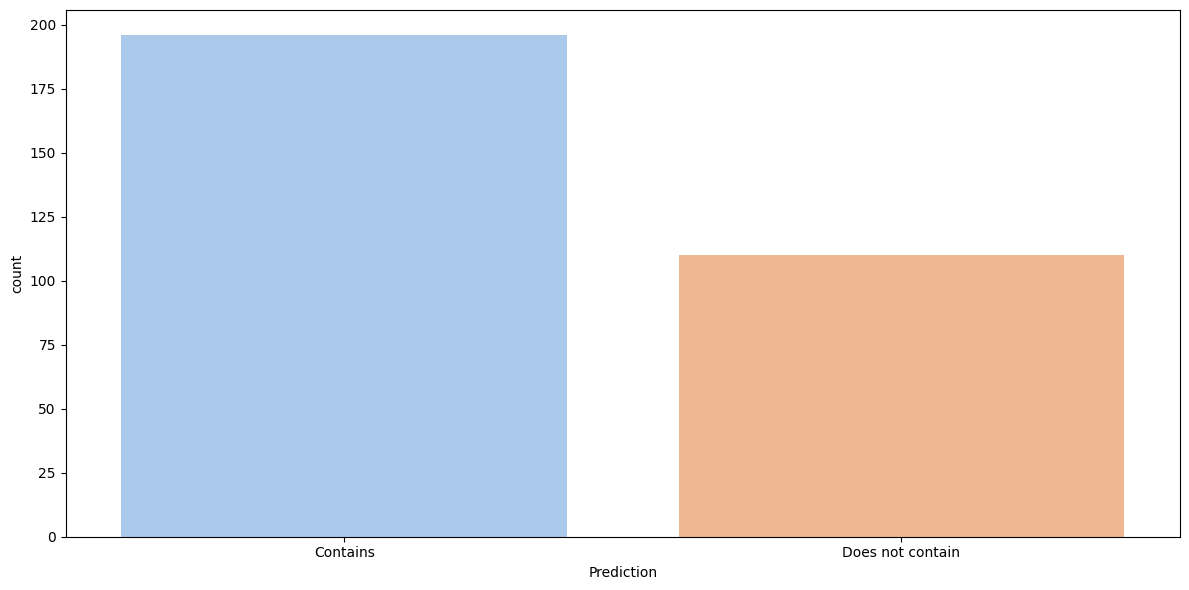

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Prediction', data=df, hue='Prediction', palette='pastel', legend=False)
plt.tight_layout()
plt.show()

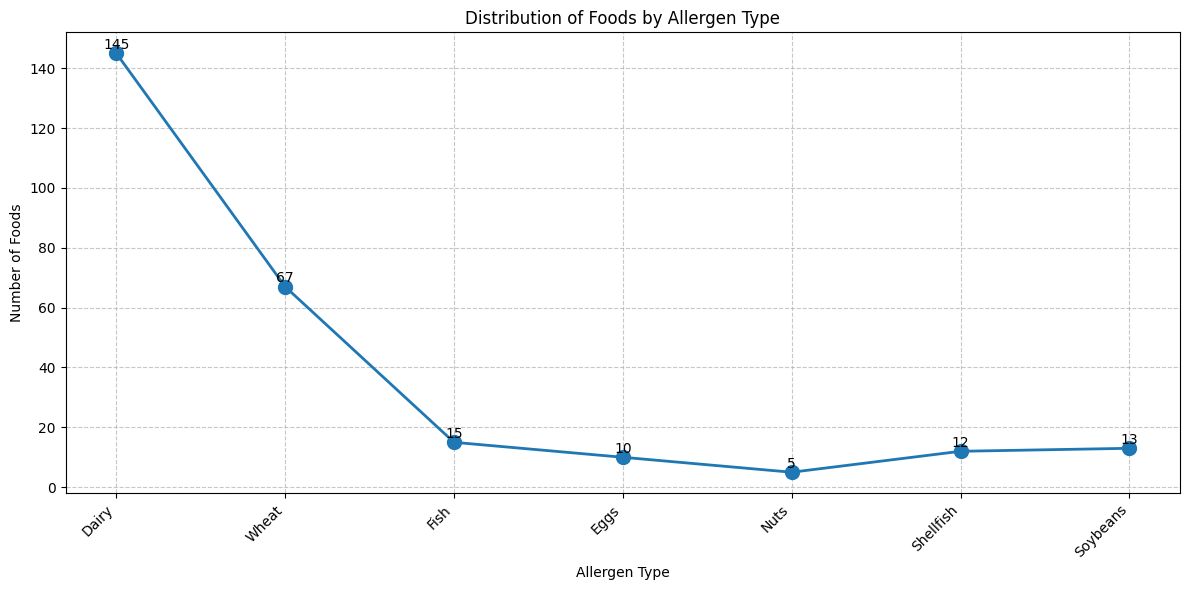

In [ ]:
dairy_foods = df[df['Allergens'].str.contains('Dairy', na=False)]
wheat_foods = df[df['Allergens'].str.contains('Wheat', na=False)]
fish_foods = df[df['Allergens'].str.contains('Fish', na=False)]
eggs_foods = df[df['Allergens'].str.contains('Eggs', na=False)]
nuts_foods = df[df['Allergens'].str.contains('Nuts', na=False)]
shellfish_foods = df[df['Allergens'].str.contains('Shellfish', na=False)]
soy_foods = df[df['Allergens'].str.contains('Soybeans', na=False)]

allergen_dict = {
    'Dairy': len(dairy_foods),
    'Wheat': len(wheat_foods),
    'Fish': len(fish_foods),
    'Eggs': len(eggs_foods),
    'Nuts': len(nuts_foods),
    'Shellfish': len(shellfish_foods),
    'Soybeans': len(soy_foods)
}

data = list(allergen_dict.values())
labels = list(allergen_dict.keys())

plt.figure(figsize=(12, 6))
plt.plot(range(len(data)), data, marker='o', linewidth=2, markersize=10)

plt.title('Distribution of Foods by Allergen Type')
plt.xlabel('Allergen Type')
plt.ylabel('Number of Foods')

plt.xticks(range(len(labels)), labels, rotation=45, ha='right')


for i, v in enumerate(data):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

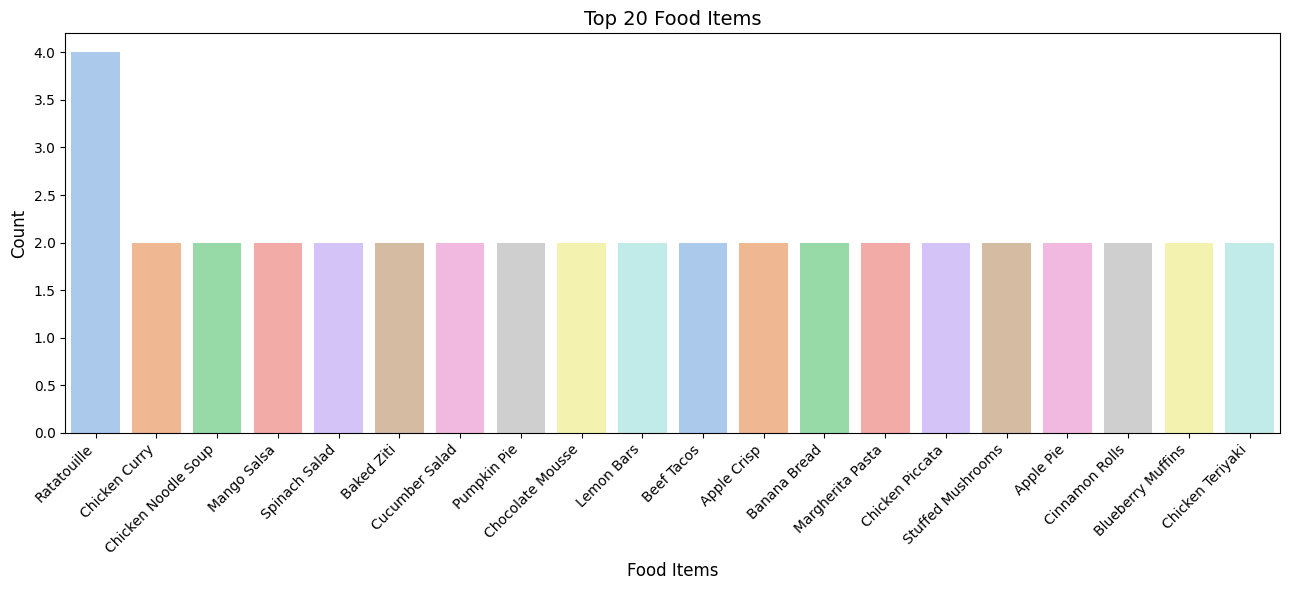

In [ ]:
top_20_foods = df['Food Product'].value_counts().head(20)

plt.figure(figsize=(13, 6))

bars = sns.barplot(
    x=top_20_foods.index,
    y=top_20_foods.values,
    hue=top_20_foods.index,
    legend=False,
    palette='pastel'
)

plt.xticks(rotation=45, ha='right')

plt.xlabel('Food Items', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Top 20 Food Items', fontsize=14)

plt.tight_layout()

plt.show()

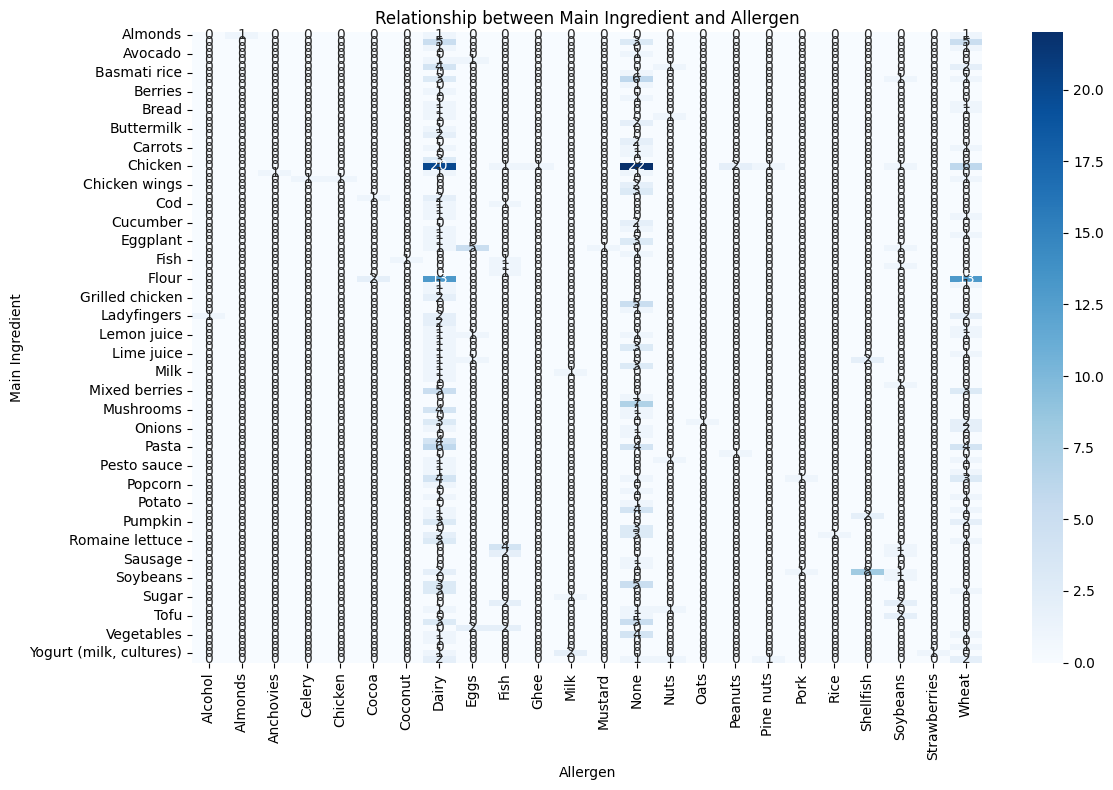

In [ ]:
ingredient_allergen_relation = {}


for _, row in df.iterrows():
    main_ingredient = row['Main Ingredient']
    allergens = str(row['Allergens']).split(', ')

    if main_ingredient not in ingredient_allergen_relation:
        ingredient_allergen_relation[main_ingredient] = {}

    for allergen in allergens:
        if allergen not in ingredient_allergen_relation[main_ingredient]:
            ingredient_allergen_relation[main_ingredient][allergen] = 0
        ingredient_allergen_relation[main_ingredient][allergen] += 1

relation_df = pd.DataFrame([(ingredient, allergen, count)
                            for ingredient, allergens in ingredient_allergen_relation.items()
                            for allergen, count in allergens.items()],
                           columns=['Main Ingredient', 'Allergen', 'Count'])


plt.figure(figsize=(12, 8))
heatmap_data = relation_df.pivot(index='Main Ingredient', columns='Allergen', values='Count').fillna(0)
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='g')
plt.title('Relationship between Main Ingredient and Allergen')
plt.xlabel('Allergen')
plt.ylabel ('Main Ingredient')
plt.tight_layout()
plt.show()

In [ ]:
print("=== Basic Descriptive Statistics ===")
print("\nNumber of Records:", len(df))
print("\nNumber of Unique Food:", df['Food Product'].nunique())
print("\nNumber of Different Allergens:", df['Allergens'].nunique())


=== Basic Descriptive Statistics ===

Number of Records: 306

Number of Unique Food: 259

Number of Different Allergens: 40


In [ ]:
print("\n=== Main Ingredients Analysis ===")
main_ingredients = df['Main Ingredient'].value_counts()
print("\nTop 10 Main Ingredients:")
print(main_ingredients.head(10))



=== Main Ingredients Analysis ===

Top 10 Main Ingredients:
Main Ingredient
Chicken             47
Flour               13
Pasta               10
Beef                10
Shrimp               8
Apples               8
Spinach              8
Tomatoes             8
Mixed vegetables     7
Potatoes             6
Name: count, dtype: int64


In [ ]:
print("\n=== Allergens Analysis ===")
allergens = df['Allergens'].value_counts()
print("\nAllergens Distribution:")
print(allergens)



=== Allergens Analysis ===

Allergens Distribution:
Allergens
None                      115
Dairy                      69
Wheat, Dairy               48
Wheat                       7
Soybeans                    6
Fish                        5
Shellfish                   5
Fish, Soybeans              4
Shellfish, Dairy            4
Wheat, Dairy, Nuts          3
Peanuts                     3
Milk                        3
Fish, Eggs                  2
Pine nuts, Dairy            2
Eggs                        2
Dairy, Nuts                 2
Wheat, Dairy, Cocoa         2
Dairy, Wheat                2
Shellfish, Eggs             1
Almonds, Wheat, Dairy       1
Shellfish, Pork             1
Shellfish, Soybeans         1
Wheat, Dairy, Alcohol       1
Wheat, Dairy, Eggs          1
Soybeans, Fish              1
Milk, Strawberries          1
Rice, Dairy                 1
Oats, Dairy                 1
Chicken, Wheat, Celery      1
Fish, Dairy                 1
Fish, Coconut               1
Eggs, S

In [ ]:
# Additional Statistics
print("\n=== Additional Statistics ===")
print("\nMost Common Food Combinations: \n")
print(df.groupby(['Main Ingredient', 'Seasoning']).size().sort_values(ascending=False).head())


=== Additional Statistics ===

Most Common Food Combinations: 

Main Ingredient  Seasoning               
Shrimp           Garlic, lemon               3
Tomatoes         Mozzarella cheese, basil    3
Beef             Soy sauce                   3
Apples           Cinnamon                    3
Flour            Blueberries                 2
dtype: int64


In [ ]:
top_5_allergens = relation_df.groupby('Allergen')['Count'].sum().sort_values(ascending=False).head(5)
print("\n Top 5 Common Allergens :\n")
print(top_5_allergens)


 Top 5 Common Allergens :

Allergen
Dairy       145
None        115
Wheat        67
Fish         15
Soybeans     13
Name: Count, dtype: int64


**Building The Model**

*Train/Test Split Data*

In [ ]:
X = df_numeric.drop('Prediction', axis = 1)
y = df_numeric['Prediction']

In [ ]:
# Set global seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.19, random_state = 42)

In [ ]:
X_train.shape

(247, 582)

In [ ]:
X_test.shape

(59, 582)

In [ ]:
y_train.shape

(247,)

In [ ]:
y_test.shape

(59,)

**Model Training and Predicting**

In [ ]:
# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
df_numeric['Prediction'] = le.fit_transform(df_numeric['Prediction'])

In [ ]:
# Scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# ANN model with consistent initialization
ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=6, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)),
    tf.keras.layers.Dense(units=6, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)),
    tf.keras.layers.Dense(units=1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42))
])

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(X_train, y_train, batch_size=32, epochs=100, verbose=0)

In [ ]:
# Prediction for ANN model
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
# Convert y_test to a NumPy array before reshaping
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.to_numpy().reshape(len(y_test),1)),1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [0. 0.]]


In [ ]:
# Train the data
X_train = [
    "Chicken rice vegetables", "Peanut butter jelly", "Milk eggs wheat", "Fish salmon",
    "Nuts almonds", "Soy sauce tofu", "Shrimp seafood", "Bread flour wheat",
    "Cheese milk dairy", "Vegetable salad"
]
y_train = [0, 1, 1, 1, 1, 1, 1, 1, 1, 0]

# Model Preparation
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
model = LogisticRegression().fit(X_train_vectorized, y_train)

# Logistic Regression Prediction for New Recipe
def predict_allergens(recipe):
    recipe_vector = vectorizer.transform([recipe])
    prediction = model.predict(recipe_vector)[0]
    probability = model.predict_proba(recipe_vector)[0].max()
    return {
        'prediction': "Contains Allergens" if prediction == 1 else "Does not Contain Allergens",
        'probability': probability
    }

# Test the model
test_recipes = ["Peanut butter sandwich", "Tofu soy sauce"]
for recipe in test_recipes:
    result = predict_allergens(recipe)
    print(f"\n recipe: {recipe}\n prediction: {result['prediction']}\n"f" Confidence: {result['probability']:.2f}")


 recipe: Peanut butter sandwich
 prediction: Contains Allergens
 Confidence: 0.85

 recipe: Tofu soy sauce
 prediction: Contains Allergens
 Confidence: 0.87


**Model Evaluation**

In [ ]:
# Evaluation
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

[[31  8]
 [ 0 20]]
Test Accuracy: 0.864406779661017


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.86
